<a href="https://colab.research.google.com/github/iaagulo/Machine-Learning-Basics/blob/main/Machine_Learning_1_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1.0 Human vs Machine Learning
Let's take a closer look at the difference between how we learn as humans and how machines learn.
Consider this relation between two variables, $x$ and $y$.

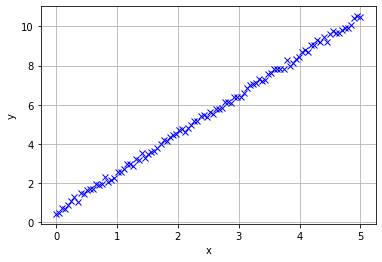

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def randomfluctuations(x,m,b,fluctuationsize):
  import random

  yrand = np.zeros(len(x))
  for i in range(len(x)):
    yrand[i] = m*x[i] + b + fluctuationsize*(random.random()-0.5)
  
  return yrand

x = np.linspace(0,5,100)
y = randomfluctuations(x,2,0.5,0.4)
plt.plot(x,y,'bx')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

*Figure 1.1. A data set that forms a straight line. But the computer doesn't know it's a straight line.*

##1.1 How we determine the best fit line

We know instinctively that this data forms a straight line, even though there's a little bit of randomness in the line. We know that we can plot a straight line that will represent this data. The straight line that fits this data set is given by $y=mx+b$, where $m$ is the slope and $b$ is the y-intercept. In this example, the slope is 2 and the y-intercept is 0.5.<br>
We can get the slope and the y-intercept using three methods. The first is we get a ruler and we draw a line that roughly passes through these points. We see that it intersects the y-axis at some point and we call that point our y-intercept. Then, we count the number of grid lines that represents the rise along the y-axis and the run along the x-axis to estimate the slope. The second method is we estimate the error between these data points and the expected value, represented by the equation of a line, and we minimize that error by doing some calculus. Minimizing gives us the slope and the y-intercept. We know this because these are the rules that mathematics taught us.<br>
Of course, the third method is to use the tools available to us in Python.

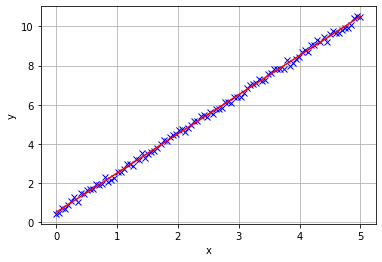

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
X = x.reshape(-1,1)  # data needs to be reshaped since the data is a single feature
Y = y.reshape(-1,1)
lr.fit(X,Y)
ypred = lr.predict(X)
plt.plot(x,y,'bx')
plt.plot(x,ypred,'r')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

*Figure 1.2. Predicted best fit line using the linear regression algorithm of MATLAB.*

##1.2 How a computer determines the best fit line

A computer doesn't know any of these rules. What the computer does after it gets the data is that it'll make several guesses for the slope and the y-intercept until the error becomes really small. In each guess, it rewrites some parameters that it uses so that the error becomes smaller and smaller. When the error is small enough, then the computer returns the final value of the slope and the y-intercept to represent the line. After all of that, the computer still doesn't know what the mathematical rules are.

This short code is a machine learning model that will solve for the best fit line of the given data $x$ and $y$. 

2.9.2


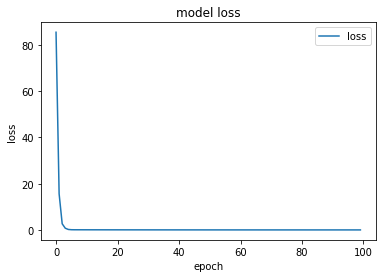

In [ ]:
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)

model_layer = keras.layers.Dense(units=1, input_shape=[1])
model = tf.keras.Sequential([model_layer])
model.compile(optimizer = 'sgd', loss = 'mean_squared_error')
history = model.fit(x,y, epochs = 100, verbose = 0)
plt.plot(history.history["loss"])
plt.title("model loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(["loss"],loc="upper right")
plt.show()

As you can see from the code, it does not directly give out a numerical value for the slope and the y-intercept. It does, however, give out the correct value to a certain margin of error of $y$ for a given value of $x$ based on the data.

In [ ]:
xtest = 3
ytest = model.predict([xtest])
print(ytest)

1/1 [==============================] - 0s 85ms/step
[[6.534462]]


##1.3 Comparing human vs machine learning

In [ ]:
yactual = 2*xtest + 0.5
print(yactual)

error = 100*(yactual - ytest)/yactual
print('The error is',error,'%.')

6.5
The error is [[-0.5301842]] %.


Comparing with the actual value of 6.5, we have an error that is about 0.14%.<br>
If we use the plot the predicted data set against the given data set, we have this result.

4/4 [==============================] - 0s 4ms/step


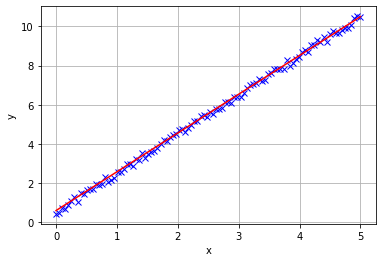

In [ ]:
ypred = model.predict([x])
plt.plot(x,y,'bx')
plt.plot(x,ypred,'r')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

Figure 1.3. Predicted best fit line by the machine learning model.

Why is there a deviation from the actual value? As you will soon learn, computers learn based on statistical techniques, which is why their guesses will not always be exact. To a computer, the value of 6.5 is the most probable result from the given data.